# **Prediction of Football matches**

## **Overview**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### **Defining the question**

1.Predict the number of goals scored by the home team.

2.Predict the number of goals scored by the away team.

3.Predict the outcome of a football match between team 1 and team 2.

### **Metric of Succcess**

1.A polynomial regression model that predicts the number of goals scored by the home team with above 50% accuracy.

2.A polynomial regression model that predicts the number of goals scored by the away team with an accuracy of above 50%.

3.A logistic regression model that predicts the outcome of a football match between team 1 and team 2.

4.Quantile, lasso and ridge regression models that predict the outcome of a football match.


###**Context**

We are given the dataset to help us understand and predict number of goals scored by the home team and the number of goals scored by the away team.

### **Experimental Design**

I will use the CRISP-DM methodology to tackle this question.Here is the flow:
1.Problem Understanding

2.Data Understanding

3.Data Preparation

4.Modelling

5.Evaluation

## ***Importing the Libraries***


In [4]:
#Ill first import the necessary libraries for this dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
#ILl then load the dataset
df_1 = pd.read_csv("/content/fifa_ranking.csv")
df_1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
#Ill then preview the second dataset,the first 4
df_2 = pd.read_csv("/content/results.csv")
df_2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Ill then create a copy of the 2 datasets
df1_copy = df_1.copy
df2_copy = df_2.copy

## ***Data Cleaning***

In [8]:
#Ill check if their is null values in the dataset
df_1.isnull().sum()
#Their are no null values in the dataset

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
#Ill then check for nulls in the second dataset 
df_2.isnull().sum()
#Their s no null values in this dataset

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [10]:
#Ill then check the column names in first dataset
df_1.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [11]:
#Ill then check the column names in second dataset
df_2.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [12]:
#Ill then check the iformation of the dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [13]:
#Ill then check the information of the other dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [14]:
#ILl then check the datatypes of the first dataset(fifa dataset)
df_1.dtypes
#For appropriate reasons

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [15]:
#Ill then check the datatype of the results dataset
df_2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [16]:
#Ill then filter out the dataset emmiting neutral grounds
df_2 = df_2[df_2.neutral == False]
df_2.head()




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [17]:
#Ill then work with the date column to convert it to the day, the month and the year
df_2['year'] = pd.DatetimeIndex(df_2['date']).year
df_2['month'] = pd.DatetimeIndex(df_2['date']).month
df_2['day'] = pd.DatetimeIndex(df_2['date']).day



In [18]:
#ILl then confirm if it has been converted
df_2.head(2)
#It has been converted

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8


In [19]:
#Ill then drop the date column since we don't need it anymore
#Ill also drop the neutral column since its "False" in every game
df_2 = df_2.drop(['date','neutral'], 1)
df_2
#They have been dropped

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,1873,3,8
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7
3,England,Scotland,2,2,Friendly,London,England,1875,3,6
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4
...,...,...,...,...,...,...,...,...,...,...
40803,Samoa,Papua New Guinea,0,6,Pacific Games,Apia,Samoa,2019,7,8
40817,Samoa,Tonga,2,0,Pacific Games,Apia,Samoa,2019,7,12
40821,India,North Korea,2,5,Intercontinental Cup,Ahmedabad,India,2019,7,13
40829,India,Syria,1,1,Intercontinental Cup,Ahmedabad,India,2019,7,16


In [20]:
#Ill then create an algorithim that will determine the outcome of the football match

outcome = []

for i in range(len(df_2['home_team'])):
  if df_2.home_score.iloc[i] > df_2.away_score.iloc[i]:
    outcome.append('Win')
  elif df_2['home_score'].iloc[i] < df_2.away_score.iloc[i]:
    outcome.append('Lose')
  else:
    outcome.append('Draw')
  
#ILl then create a new column for the outcome
df_2['outcome'] = outcome
df_2.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
#ILl then preview if the algorithim has worked
df_2.head(10)
#It has worked


,home_team,away_team,home_score,away_score,tournament,city,country,year,month,day,outcome
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw
1,England,Scotland,4,2,Friendly,London,England,1873,3,8,Win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Win
3,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Win
5,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,1876,3,25,Win
6,England,Scotland,1,3,Friendly,London,England,1877,3,3,Lose
7,Wales,Scotland,0,2,Friendly,Wrexham,Wales,1877,3,5,Lose
8,Scotland,England,7,2,Friendly,Glasgow,Scotland,1878,3,2,Win
9,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,1878,3,23,Win


In [21]:
#Ill then split the rank_date column into day, month and year in the fifa_ranking dataset
df_1['year'] = pd.DatetimeIndex(df_1['rank_date']).year
df_1['month'] = pd.DatetimeIndex(df_1['rank_date']).month
df_1['day'] = pd.DatetimeIndex(df_1['rank_date']).day


In [22]:
#ILl then confirm if the date has been split.
df_1.head(6)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8


In [23]:
#Ill then drop unnecessary columns in fifa_ranking dataset
df_1.drop(['country_abrv','rank_date', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [24]:
#Ill then preview the dataset to see if they have been dropped
df_1.head()

,rank,country_full,previous_points,rank_change,year,month,day
0,1,Germany,57,0,1993,8,8
1,2,Italy,57,0,1993,8,8
2,3,Switzerland,50,9,1993,8,8
3,4,Sweden,55,0,1993,8,8
4,5,Argentina,51,5,1993,8,8


In [25]:
#Ill then drop the rank change in the dataset
df_1.drop(['rank_change'],axis=1)

,rank,country_full,previous_points,year,month,day
0,1,Germany,57,1993,8,8
1,2,Italy,57,1993,8,8
2,3,Switzerland,50,1993,8,8
3,4,Sweden,55,1993,8,8
4,5,Argentina,51,1993,8,8
...,...,...,...,...,...,...
57788,206,Anguilla,0,2018,6,7
57789,206,Bahamas,0,2018,6,7
57790,206,Eritrea,0,2018,6,7
57791,206,Somalia,0,2018,6,7


**Filtering out the dataset**

In [26]:
df_2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,day,outcome
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw
1,England,Scotland,4,2,Friendly,London,England,1873,3,8,Win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Win
3,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Win


In [27]:
#Checking for unique values in the tournament column
df_2.tournament.unique()
#Ill work with relevant tournament fields

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'UEFA Euro qualification', 'UEFA Euro',
       'Merdeka Tournament', 'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Copa Juan Pinto Durán', 'UAFA Cup',
       'CONCACAF Championship', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Co

In [28]:
#Ill then create a function that will hold an algorithim for selected tournament type
def excluding(tournament):
  if tournament == 'Friendly':
    return 'Friendly'
  elif tournament == 'FIFA World Cup':
    return 'World Cup'
  else:
    return 'Other'

df_2['tournament'] = df_2.tournament.apply(lambda x: excluding(x))
df_2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,year,month,day,outcome
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,1872,11,30,Draw
1,England,Scotland,4,2,Friendly,London,England,1873,3,8,Win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,1874,3,7,Win
3,England,Scotland,2,2,Friendly,London,England,1875,3,6,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,1876,3,4,Win


In [32]:
#Ill then confirm the unique tournaments
filtered_results_df = df_2.tournament.unique()
filtered_results_df

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [33]:
#Ill also filter out the years in results dataset
filtered_results_df = df_2[df_2['year'].between(2006,2018, inclusive=True)]
filtered_results_df.head()


,home_team,away_team,home_score,away_score,tournament,city,country,year,month,day,outcome
28033,Qatar,Libya,2,0,Friendly,Doha,Qatar,2006,1,2,Win
28034,Egypt,Zimbabwe,2,0,Friendly,Alexandria,Egypt,2006,1,5,Win
28036,Morocco,DR Congo,3,0,Friendly,Rabat,Morocco,2006,1,9,Win
28038,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,2006,1,12,Win
28039,Egypt,South Africa,1,2,Friendly,Cairo,Egypt,2006,1,14,Lose


In [34]:
filtered_results_df.shape
#8776 rows and 11 columns

(8776, 11)

In [35]:
#Ill then filter  out the first dataset in years as well
filtered_ranking_df = df_1[df_1['year'].between(2006,2018, inclusive=True)]
filtered_ranking_df.head()


,rank,country_full,previous_points,rank_change,year,month,day
26938,1,Brazil,840,0,2006,1,18
26939,2,Czech Republic,796,0,2006,1,18
26940,3,Netherlands,791,0,2006,1,18
26941,4,Argentina,772,0,2006,1,18
26942,5,Spain,768,0,2006,1,18


In [36]:
filtered_ranking_df.shape

(30855, 7)

***Merging the datasets***

In [37]:
#Ill then merge the 2 datasets for analysis and prediction
merged = pd.merge(filtered_ranking_df, filtered_results_df, how='left', left_on=['month','year'], right_on=['month', 'year'])


In [38]:
#ILl then preview the merged dataset
merged.head(10)

,rank,country_full,previous_points,rank_change,year,month,day_x,home_team,away_team,home_score,away_score,tournament,city,country,day_y,outcome
0,1,Brazil,840,0,2006,1,18,Qatar,Libya,2,0,Friendly,Doha,Qatar,2,Win
1,1,Brazil,840,0,2006,1,18,Egypt,Zimbabwe,2,0,Friendly,Alexandria,Egypt,5,Win
2,1,Brazil,840,0,2006,1,18,Morocco,DR Congo,3,0,Friendly,Rabat,Morocco,9,Win
3,1,Brazil,840,0,2006,1,18,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,12,Win
4,1,Brazil,840,0,2006,1,18,Egypt,South Africa,1,2,Friendly,Cairo,Egypt,14,Lose
5,1,Brazil,840,0,2006,1,18,Morocco,Zimbabwe,1,0,Friendly,Marrakech,Morocco,14,Win
6,1,Brazil,840,0,2006,1,18,Senegal,DR Congo,0,0,Friendly,Dakar,Senegal,14,Draw
7,1,Brazil,840,0,2006,1,18,Tunisia,Ghana,2,0,Friendly,Tunis,Tunisia,15,Win
8,1,Brazil,840,0,2006,1,18,Morocco,Angola,2,2,Friendly,Marrakech,Morocco,17,Draw
9,1,Brazil,840,0,2006,1,18,Saudi Arabia,Sweden,1,1,Friendly,Riyadh,Saudi Arabia,18,Draw


In [40]:
merged.shape

(1744040, 16)

**Cleaning the Merged dataset**

In [41]:
#Ill then drop some irrelevant column names
merged = merged.drop(['rank_change'],axis = 1)

In [42]:
#Ill also drop other irrelevant column names
merged = merged.drop(['day_x','day_y'],axis=1)

In [43]:
#Ill then check the column names in the dataset
merged.columns

Index(['rank', 'country_full', 'previous_points', 'year', 'month', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'outcome'],
      dtype='object')

In [44]:
#Ill then check the shape of the dataset
merged.shape
#The merged dataset has 3157060 rows × 16 columns

(1744040, 13)

In [45]:
#Ill then check the column names of the dataset
merged.columns


Index(['rank', 'country_full', 'previous_points', 'year', 'month', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'outcome'],
      dtype='object')

In [46]:
#Ill then check for duplicated values
merged.duplicated().sum()
#The dataset has 3 thousand duplicated values

3908

In [47]:
#Ill then proceed to drop the duplicated values
merged.drop_duplicates(inplace=True)

In [48]:
merged.duplicated().sum()
#Ill then confirm if they have been droppped


0

In [49]:
#ILl then get the ranks of the home team and away team

home_rank = merged[merged.home_team == merged.country_full]
home_rank.head()
#Here I have selected observations equal to country so as to get the home ranks


,rank,country_full,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,city,country,outcome
597,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win
601,28,Tunisia,685,2006,1,Tunisia,Ghana,2,0,Friendly,Tunis,Tunisia,Win
666,30,Senegal,672,2006,1,Senegal,DR Congo,0,0,Friendly,Dakar,Senegal,Draw
683,32,Egypt,665,2006,1,Egypt,Zimbabwe,2,0,Friendly,Alexandria,Egypt,Win
686,32,Egypt,665,2006,1,Egypt,South Africa,1,2,Friendly,Cairo,Egypt,Lose


In [50]:
#Renaming the columns
home_rank = home_rank.rename(columns={'rank':'home_rank'})
home_rank.head()

,home_rank,country_full,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,city,country,outcome
597,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win
601,28,Tunisia,685,2006,1,Tunisia,Ghana,2,0,Friendly,Tunis,Tunisia,Win
666,30,Senegal,672,2006,1,Senegal,DR Congo,0,0,Friendly,Dakar,Senegal,Draw
683,32,Egypt,665,2006,1,Egypt,Zimbabwe,2,0,Friendly,Alexandria,Egypt,Win
686,32,Egypt,665,2006,1,Egypt,South Africa,1,2,Friendly,Cairo,Egypt,Lose


In [51]:
#Ill then do the same for the away team
away_rank = merged[merged.away_team == merged.country_full]
away_rank.head()

,rank,country_full,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,city,country,outcome
295,14,Sweden,732,2006,1,Saudi Arabia,Sweden,1,1,Friendly,Riyadh,Saudi Arabia,Draw
346,16,Greece,708,2006,1,Saudi Arabia,Greece,1,1,Friendly,Riyadh,Saudi Arabia,Draw
762,35,Morocco,655,2006,1,Egypt,Morocco,0,0,Other,Cairo,Egypt,Draw
812,37,Norway,649,2006,1,United States,Norway,5,0,Friendly,Carson,United States,Win
895,41,Honduras,628,2006,1,Ecuador,Honduras,1,0,Friendly,Guayaquil,Ecuador,Win


In [52]:
away_rank = away_rank.rename({'rank': 'away_rank'}, axis=1)
away_rank.head()

,away_rank,country_full,previous_points,year,month,home_team,away_team,home_score,away_score,tournament,city,country,outcome
295,14,Sweden,732,2006,1,Saudi Arabia,Sweden,1,1,Friendly,Riyadh,Saudi Arabia,Draw
346,16,Greece,708,2006,1,Saudi Arabia,Greece,1,1,Friendly,Riyadh,Saudi Arabia,Draw
762,35,Morocco,655,2006,1,Egypt,Morocco,0,0,Other,Cairo,Egypt,Draw
812,37,Norway,649,2006,1,United States,Norway,5,0,Friendly,Carson,United States,Win
895,41,Honduras,628,2006,1,Ecuador,Honduras,1,0,Friendly,Guayaquil,Ecuador,Win


In [53]:
away_rank.drop('country',1,inplace=True)

In [55]:
#Ill then merge the new home ranks and away ranks
tired_of_Nans = pd.merge(home_rank,away_rank,how="left", on = ['away_team', 'year', 'month'])
tired_of_Nans

,home_rank,country_full_x,previous_points_x,year,month,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country,outcome_x,away_rank,country_full_y,previous_points_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,outcome_y
0,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Qatar,2.0,0.0,Friendly,Doha,Win
1,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Tunisia,1.0,0.0,Friendly,Tunis,Win
2,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Egypt,3.0,0.0,Other,Cairo,Win
3,28,Tunisia,685,2006,1,Tunisia,Ghana,2,0,Friendly,Tunis,Tunisia,Win,50.0,Ghana,608.0,Tunisia,2.0,0.0,Friendly,Tunis,Win
4,30,Senegal,672,2006,1,Senegal,DR Congo,0,0,Friendly,Dakar,Senegal,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,126,Lithuania,229,2018,6,Lithuania,Latvia,1,1,Friendly,Vilnius,Lithuania,Draw,129.0,Latvia,217.0,Lithuania,1.0,1.0,Friendly,Vilnius,Draw
9530,129,Latvia,217,2018,6,Latvia,Estonia,1,0,Other,Riga,Latvia,Win,94.0,Estonia,364.0,Latvia,1.0,0.0,Other,Riga,Win
9531,129,Latvia,217,2018,6,Latvia,Azerbaijan,1,3,Friendly,Riga,Latvia,Lose,105.0,Azerbaijan,245.0,Kazakhstan,3.0,0.0,Friendly,Astana,Win
9532,129,Latvia,217,2018,6,Latvia,Azerbaijan,1,3,Friendly,Riga,Latvia,Lose,105.0,Azerbaijan,245.0,Latvia,1.0,3.0,Friendly,Riga,Lose


**Cleaning the Newly merged dataset**

In [56]:
tired_of_Nans.isnull().sum()

home_rank              0
country_full_x         0
previous_points_x      0
year                   0
month                  0
home_team_x            0
away_team              0
home_score_x           0
away_score_x           0
tournament_x           0
city_x                 0
country                0
outcome_x              0
away_rank            630
country_full_y       630
previous_points_y    630
home_team_y          630
home_score_y         630
away_score_y         630
tournament_y         630
city_y               630
outcome_y            630
dtype: int64

In [57]:
tired_of_Nans.dropna(inplace=True)

In [58]:
tired_of_Nans.duplicated().sum()

0

In [59]:
tired_of_Nans.head()


,home_rank,country_full_x,previous_points_x,year,month,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country,outcome_x,away_rank,country_full_y,previous_points_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,outcome_y
0,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Qatar,2.0,0.0,Friendly,Doha,Win
1,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Tunisia,1.0,0.0,Friendly,Tunis,Win
2,28,Tunisia,685,2006,1,Tunisia,Libya,1,0,Friendly,Tunis,Tunisia,Win,80.0,Libya,522.0,Egypt,3.0,0.0,Other,Cairo,Win
3,28,Tunisia,685,2006,1,Tunisia,Ghana,2,0,Friendly,Tunis,Tunisia,Win,50.0,Ghana,608.0,Tunisia,2.0,0.0,Friendly,Tunis,Win
5,32,Egypt,665,2006,1,Egypt,Zimbabwe,2,0,Friendly,Alexandria,Egypt,Win,53.0,Zimbabwe,601.0,Egypt,2.0,0.0,Friendly,Alexandria,Win


In [61]:
#Ill then drop unnecesary columns in the dataset
tired_of_Nans.drop(['country_full_x','previous_points_x',
        'previous_points_y','home_team_y',	'home_score_y',	'away_score_y',	'tournament_y',	'city_y',
       		'outcome_y'], axis = 1, inplace = True)

In [64]:
tired_of_Nans.columns

Index(['home_rank', 'year', 'month', 'home_team_x', 'away_team',
       'home_score_x', 'away_score_x', 'tournament_x', 'city_x', 'country',
       'outcome_x', 'away_rank', 'country_full_y'],
      dtype='object')

In [63]:
tired_of_Nans.shape

(8904, 13)

In [65]:
#Ill then drop other irrelevant columns in the dataset
tired_of_Nans.drop(['city_x','country_full_y'],axis=1,inplace=True)

In [66]:
tired_of_Nans.head()

,home_rank,year,month,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country,outcome_x,away_rank
0,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
1,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
2,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
3,28,2006,1,Tunisia,Ghana,2,0,Friendly,Tunisia,Win,50.0
5,32,2006,1,Egypt,Zimbabwe,2,0,Friendly,Egypt,Win,53.0


In [71]:
#Ill then rename some of the columns in the dataset
tired_of_Nans = tired_of_Nans.rename({'home_team_x': 'home_team','home_score_x':'home_score',
                                      'away_score_x':'away_score','tournament_x':'tournament',
                                      'outcome_x':'outcome'},axis=1)


In [72]:
#Ill then confirm if it has been renamed
tired_of_Nans.head()

,home_rank,year,month,home_team,away_team,home_score,away_score,tournament,country,outcome,away_rank
0,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
1,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
2,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
3,28,2006,1,Tunisia,Ghana,2,0,Friendly,Tunisia,Win,50.0
5,32,2006,1,Egypt,Zimbabwe,2,0,Friendly,Egypt,Win,53.0


## **Exploratory Data Analysis**

In [73]:
#Ill then preview the dataset again
tired_of_Nans.shape

(8904, 11)

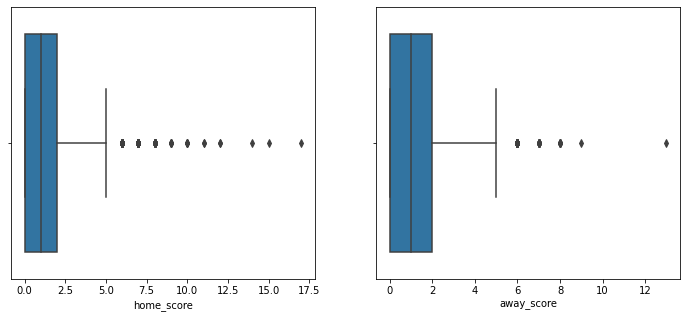

In [74]:
#Ill use a boxplot to check for outliers in home_score and away_score
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(tired_of_Nans.home_score, ax=ax1)
sns.boxplot(tired_of_Nans.away_score, ax=ax2)

plt.show()
#Their is presence of outliers


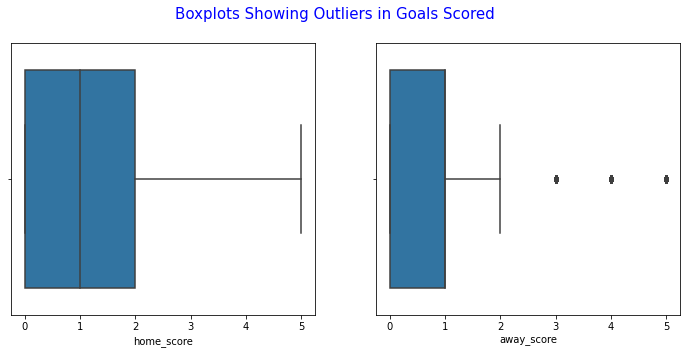

In [76]:
#Ill then take out the outliers 
#Ill also plot a boxplot to check if their are still their

Q1 = merged.quantile(0.25)
Q3 = merged.quantile(0.75)
IQR = Q3 - Q1
df_3 = tired_of_Nans[~((tired_of_Nans< (Q1 - 1.5 * IQR)) | (tired_of_Nans > (Q3 + 1.5 * IQR)))]

fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df_3.home_score, ax=ax1)
sns.boxplot(df_3.away_score, ax=ax2)
fig.suptitle('Boxplots Showing Outliers in Goals Scored', fontsize=15, color='b')

plt.show()
#Their are no presence of outliers

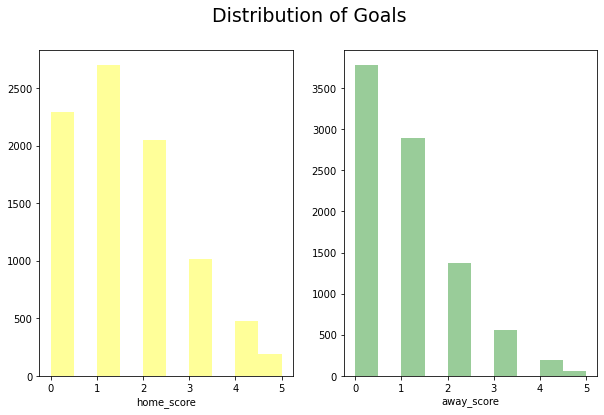

In [77]:
#Ill use a histogram to plot the difference between home goals and away goals.
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
sns.distplot(df_3['home_score'], bins=10, ax =ax1, kde=False, color='yellow')
sns.distplot(df_3['away_score'], bins=10, ax =ax2, kde=False, color ='green')
fig.suptitle('Distribution of Goals', fontsize=19, color='black')
plt.show()

***Coorelation***

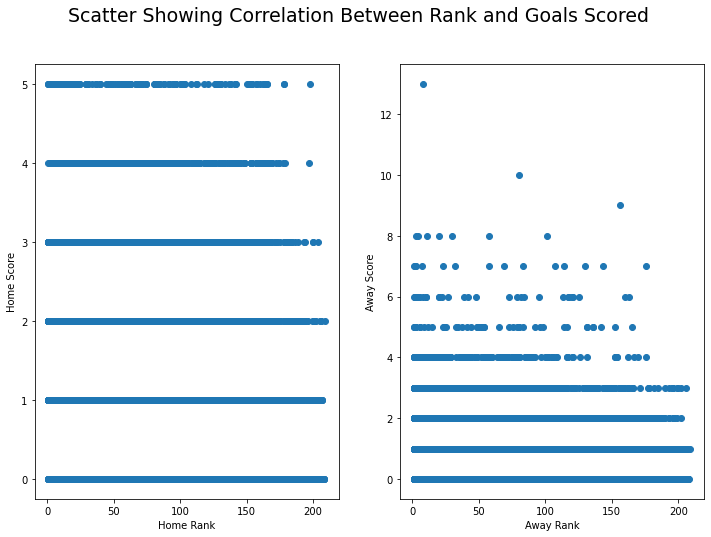

In [78]:
#ILl then plot a scatter plot showing Correlation Between Rank and Goals Scored
fig, [axx1, axx2] = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
fig.suptitle('Scatter Showing Correlation Between Rank and Goals Scored', fontsize=19, color='black')
axx1.scatter(df_3.home_rank, df_3.home_score)
axx1.set_xlabel('Home Rank')
axx1.set_ylabel('Home Score')
axx2.scatter(away_rank.away_rank, away_rank.away_score )
axx2.set_xlabel('Away Rank')
axx2.set_ylabel('Away Score')

plt.show()

In [80]:
#Ill then check for nulls in the dataset
df_3.isnull().sum()

home_rank       0
year            0
month           0
home_team       0
away_team       0
home_score    189
away_score     59
tournament      0
country         0
outcome         0
away_rank       0
dtype: int64

In [81]:
#ILl then drop the nulls
df_3.dropna(inplace=True)

In [82]:
#Ill then confirm if it has been dropped
df_3.isnull().sum()

home_rank     0
year          0
month         0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
outcome       0
away_rank     0
dtype: int64

**Mulitcollinearity**

In [83]:
#Ill then check for correlation

correlation = df_3.corr()
correlation


,home_rank,year,month,home_score,away_score,away_rank
home_rank,1.000000,0.018811,0.007672,-0.182160,0.191458,0.436518
year,0.018811,1.000000,0.027885,0.002243,-0.000628,0.043526
month,0.007672,0.027885,1.000000,0.019201,0.041988,-0.011079
home_score,-0.182160,0.002243,0.019201,1.000000,-0.134498,0.273695
away_score,0.191458,-0.000628,0.041988,-0.134498,1.000000,-0.224575
away_rank,0.436518,0.043526,-0.011079,0.273695,-0.224575,1.000000


In [87]:
#Ill then calculate the VIF score for each of the numerical varaible
pd.DataFrame(np.linalg.inv(correlation.values), index=correlation.index, columns=correlation.columns)


,home_rank,year,month,home_score,away_score,away_rank
home_rank,1.571798,0.009351,-0.013097,0.478017,-0.441966,-0.916755
year,0.009351,1.002933,-0.028462,0.013404,-0.010297,-0.054032
month,-0.013097,-0.028462,1.003379,-0.031834,-0.039920,0.017820
home_score,0.478017,0.013404,-0.031834,1.233822,-0.049640,-0.558438
away_score,-0.441966,-0.010297,-0.039920,-0.049640,1.185794,0.472818
away_rank,-0.916755,-0.054032,0.017820,-0.558438,0.472818,1.661754


***Conclusion***

Upon detecting Multicolinearity,the VIF score

shows that the variables is not between 5 and 10.

Therefore no correlation.

### **Polynomial Regression**



In [89]:
#Ill create a model that predicts the goals scored by home team
model_Polynomial = df_3[['home_rank','home_score']]
model_Polynomial.head()

,home_rank,home_score
0,28,1.0
1,28,1.0
2,28,1.0
3,28,2.0
5,32,2.0


In [90]:
#Ill then show the target variables
fitting1 = model_Polynomial.home_rank.values.reshape(-1,1)

greg = np.arange(fitting1.min(), fitting1.max(), 1)[:, np.newaxis]
katono= model_Polynomial.home_score.values.reshape(-1,1)

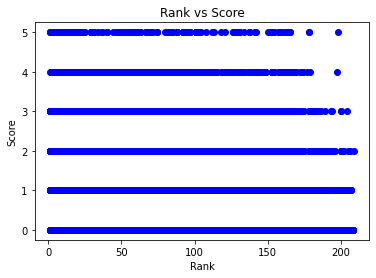

In [91]:
#Ill then plot a scatter plot to find if their is any relationship
plt.scatter(fitting1, katono, color='blue') 
plt.title('Rank vs Score')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()
#No relationship shown

In [92]:
#Ill then split the features to training and test
X_train, X_test, Y_train, Y_test = train_test_split(fitting1,katono, test_size=0.3, random_state=23)


In [97]:
#ILl then create features, polynomial and quadratic
#Ill also add Linear Regression
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
x_quad = quadratic.fit_transform(X_train)
x_test = quadratic.fit_transform(X_test)
x_cube = cubic.fit_transform(X_train)
lin= LinearRegression()
quad = lin.fit(X_train, Y_train)
y_lin = lin.predict(greg)
l_r2 = r2_score(Y_test, lin.predict(X_test))

In [102]:
#Fitting
linpol = lin.fit(x_quad, Y_train)
y_quad_fit = linpol.predict(quadratic.fit_transform(greg))

# calculating R squared
polpre = linpol.predict(x_quad)
quad_r2 = r2_score(Y_train, polpre)
print('Quad RMSE: ', np.sqrt(mean_squared_error(Y_train, polpre)), '\nQuad r_squared: ', quad_r2)

Quad RMSE:  1.2449639664224987 
Quad r_squared:  0.03207154557706182


In [ ]:
# getting the residuals to check for heteroskedasticity 
resid = np.subtract(polpre, lebo_train)
pd.DataFrame(resid)

resid.mean()

In [103]:
# Ill then get the residuals to check for heteroskedasticity 
residuals= np.subtract(polpre, Y_train)
pd.DataFrame(residuals)

residuals.mean()

1.6300617308244582e-16

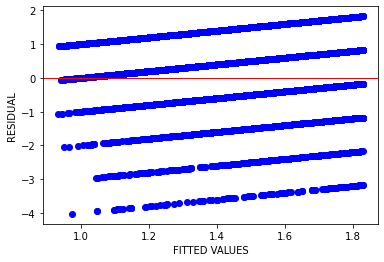

In [107]:
#Ill then plot the residuals
plt.scatter(polpre, residuals, color='blue')
plt.ylabel('RESIDUAL')
plt.xlabel('FITTED VALUES')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

***Conclusion***

On calculating the RMSE, we found that it is 1.2449639664224987. Therefore meaning the model is not good for predicting data since RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy.IN OUR CASE IT IS A HIGH RMSE 

***Logistice Regression Approach***


In [109]:
#Creating a copy of the dataframe
very_tired_of_Nulls = tired_of_Nans

In [110]:
#Ill then view the dataframe
very_tired_of_Nulls.head()

,home_rank,year,month,home_team,away_team,home_score,away_score,tournament,country,outcome,away_rank
0,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
1,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
2,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
3,28,2006,1,Tunisia,Ghana,2,0,Friendly,Tunisia,Win,50.0
5,32,2006,1,Egypt,Zimbabwe,2,0,Friendly,Egypt,Win,53.0


In [113]:

logistic = very_tired_of_Nulls.drop(['outcome', 'home_score', 'away_score'], 1)
regression = very_tired_of_Nulls['outcome']

In [115]:
# Ill then create dummy variables to convert categorical columns to numerical variables
dummy = pd.get_dummies(logistic, drop_first=True)
dummy.head()

,home_rank,year,month,away_rank,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,...,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Sweden,country_Switzerland,country_Syria,country_Tahiti,country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe
0,28,2006,1,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28,2006,1,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,2006,1,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,2006,1,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,32,2006,1,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
#Ill then split the datset into train and test
x_train, x_test, y_train, y_test = train_test_split(dummy,regression, test_size=0.2, random_state=123)


In [117]:
#Ill then initialise the model

greg = LogisticRegression()
# training the model on the training set
greg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#Ill start making predictions with the model
predict = greg.predict(x_test)
predict


array(['Win', 'Win', 'Win', ..., 'Win', 'Win', 'Win'], dtype=object)

In [120]:
#Evaluating the perfomance of the model
print('Logistic Model Accuracy: {:.4f}' .format(accuracy_score(y_test, predict)))

print('Confusion Matrix: \n{}' .format(confusion_matrix(y_test, predict)))

Logistic Model Accuracy: 0.6064
Confusion Matrix: 
[[  0 120 282]
 [  0 288 200]
 [  2  97 792]]


***The accuracy of the output when using logistic Model shows a 60% accuracy***

In [119]:
#Ill then evalute the perfomance of the model
train_accuracy = greg.score(x_train, y_train)
test_accuracy = greg.score(x_test, y_test)

print('Training set accuracy: %.4f' % train_accuracy)
print('Test set accuracy: %.4f' % test_accuracy)

Training set accuracy: 0.5885
Test set accuracy: 0.6064


***The developed logistic model has 58% accuracy on the training set and 60% accuracy on the test set.***

### ***Hyperparemeter Tuning***

In [126]:
#Cross Validation
Hyper =LogisticRegression(C=1, penalty='l1', solver='liblinear')


In [127]:
#Ill then fit the model
Hyper.fit(x_train,y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
#Ill then get the accuracy score of the model
Hyper.score(x_train, y_train)


0.6324582338902148

In [129]:
folds = KFold(n_splits=10, random_state=34)


In [130]:
# getting the cross validation score
from sklearn.model_selection import cross_val_score

selection = cross_val_score(Hyper, dummy, regression, cv=folds, scoring='accuracy')
print(selection.mean())

0.5764854537888244


In [131]:
# instantiating the logistic regression model
Grid_search= LogisticRegression()

# defining the paramenters/hyperparameters
penalty = ['l2']
dual = [True,False]
max_iter = [100,120,130]
C = [1.0,2.0,2.5]

# Creating hyperparameter options
hparameters = dict( penalty=penalty, dual=dual, max_iter=max_iter, C=C)

hparameters

{'C': [1.0, 2.0, 2.5],
 'dual': [True, False],
 'max_iter': [100, 120, 130],
 'penalty': ['l2']}

***Hypertuning Conclusion***

Upon doing the tests,the cross validator score was 58%.

### ***Quantile Regression***

In [134]:
tired_of_Nans.head()

,home_rank,year,month,home_team,away_team,home_score,away_score,tournament,country,outcome,away_rank
0,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
1,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
2,28,2006,1,Tunisia,Libya,1,0,Friendly,Tunisia,Win,80.0
3,28,2006,1,Tunisia,Ghana,2,0,Friendly,Tunisia,Win,50.0
5,32,2006,1,Egypt,Zimbabwe,2,0,Friendly,Egypt,Win,53.0


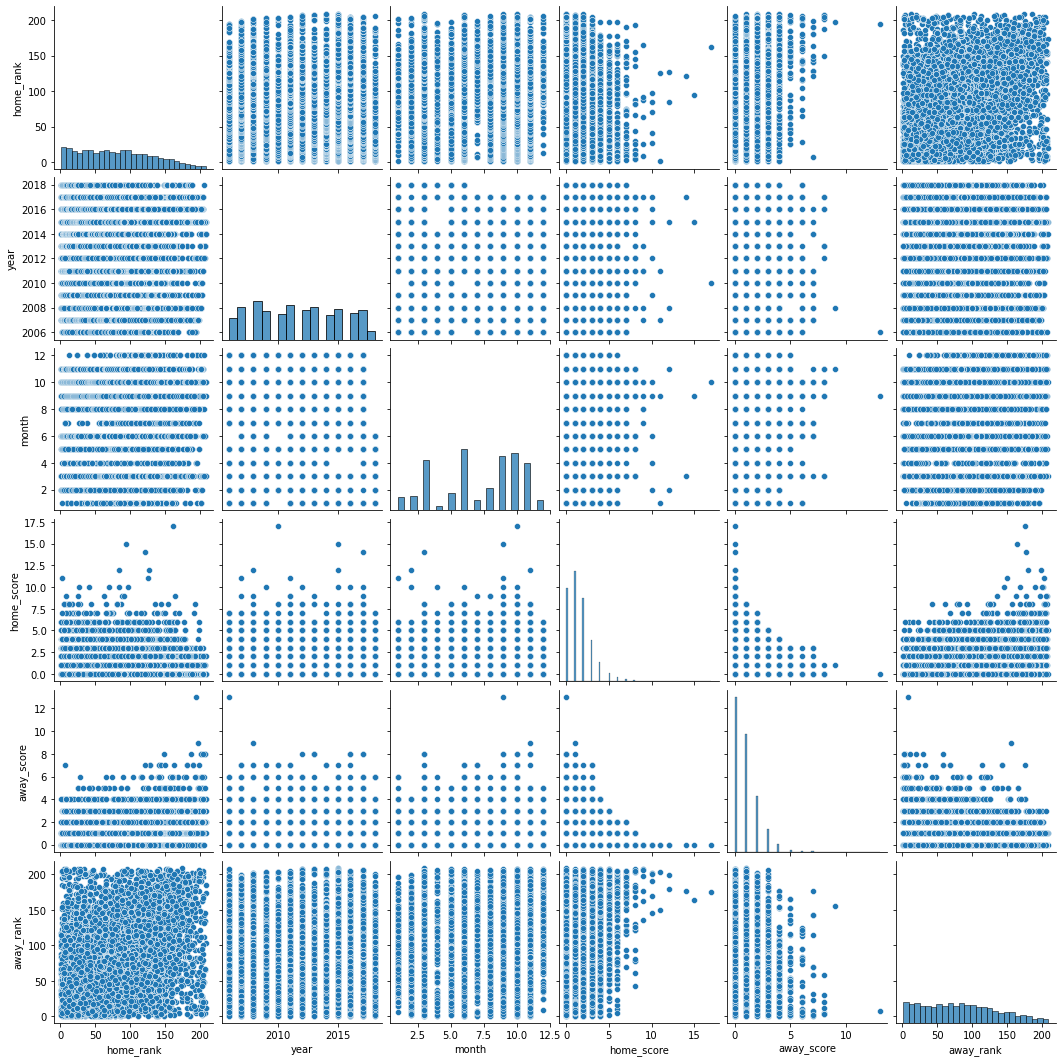

In [135]:
sns.pairplot(tired_of_Nans, dropna=True)
#Ill then visualize a pairplot to help in picking the variables suitable for quantile regression



In [137]:
# Ill then use home rank and home_score columns as they are both skewed to the right
c = smf.quantreg('home_score ~ home_rank', tired_of_Nans)
d = c.fit(q=.5)
print(d.summary())

                         QuantReg Regression Results                          
Dep. Variable:             home_score   Pseudo R-squared:           -1.222e-07
Model:                       QuantReg   Bandwidth:                      0.3515
Method:                 Least Squares   Sparsity:                        1.547
Date:                Sat, 17 Jul 2021   No. Observations:                 8904
Time:                        14:39:54   Df Residuals:                     8902
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      0.015     65.194      0.000       0.970       1.030
home_rank  -3.477e-07      0.000     -0.002      0.998      -0.000       0.000


# ***Conclusion***
 Predicting whether home team wins, loses or draws in a match:
 
 1.The best accuracy score using two hyperparameters is 58%. I would recommend more hyperparameters should be tuned.
 

 We may also improve our accuracy by using more data for training

